In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
## here i dont require some columns for the further analysis so drop them

df.drop(columns=(['day','month','year']), inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
## Encoding

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [9]:
## select independent and dependent features

X = df.drop(['FWI'],axis=1) ## except fwi all are independent features
y = df['FWI']
X.shape

(243, 11)

In [10]:
y.shape

(243,)

In [11]:
## here there is one dependent feature and multiple independent features are there so, this is Multiple Linear Regression

In [13]:
## Model Selection

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 11)
(61, 11)
(182,)
(61,)


<Axes: >

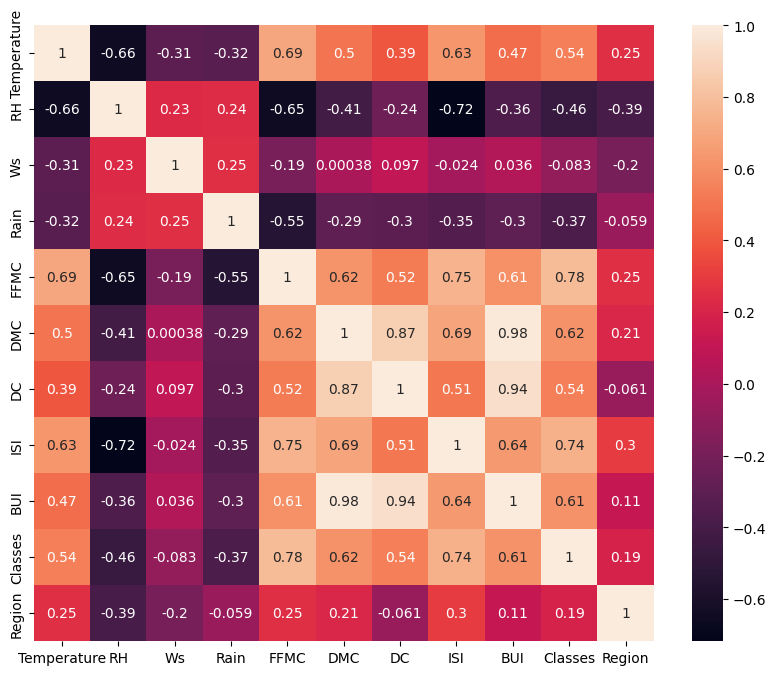

In [14]:
## feature selection based on collinearity

plt.figure(figsize=(10,8))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [15]:
## function to find the specified correlations

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)

    return col_corr

In [16]:
correlation(X_train,0.85)

{'BUI', 'DC'}

In [17]:
## drop these featues

corr = correlation(X_train,0.85)
X_train.drop(corr,axis=1,inplace=True)
X_test.drop(corr,axis=1, inplace=True)

In [18]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [19]:
## Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [20]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

Text(0.5, 1.0, 'X_train after scaling')

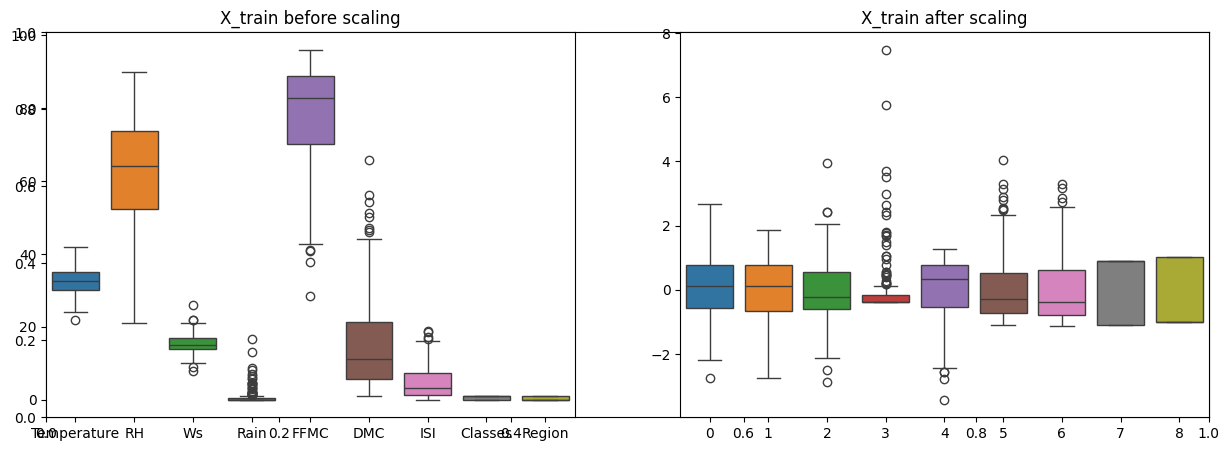

In [21]:
## Box plots to understand the effect of Standardization

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

In [22]:
## now Regression Analysis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

linreg = LinearRegression()

linreg.fit(X_train_scaled,y_train)

y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.546823646524997


In [23]:
r_score = r2_score(y_test, y_pred)
print(r_score)

0.9847657384266951


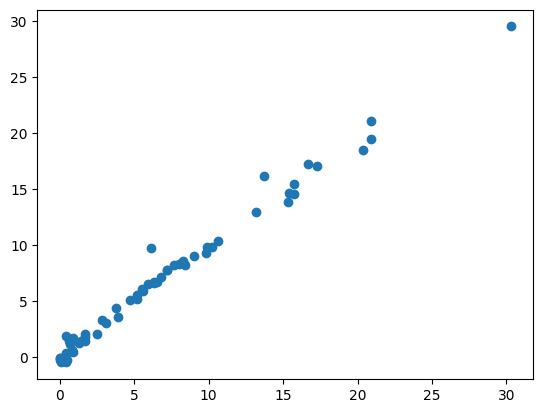

In [24]:
plt.scatter(y_test,y_pred)


In [25]:
## Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

r_score = r2_score(y_test, y_pred)
print(r_score)

1.133175994914409
0.9492020263112388


In [26]:
## cross validation (cv)

from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [27]:
lassocv.alpha_

np.float64(0.05725391318234408)

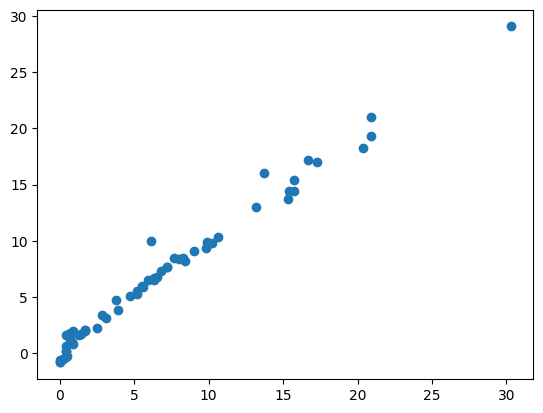

In [28]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)

In [29]:
## Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

r_score = r2_score(y_test, y_pred)
print(r_score)

0.5642305340105691
0.9842993364555513


In [30]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

r_score = r2_score(y_test, y_pred)
print(r_score)

0.5642305340105691
0.9842993364555513


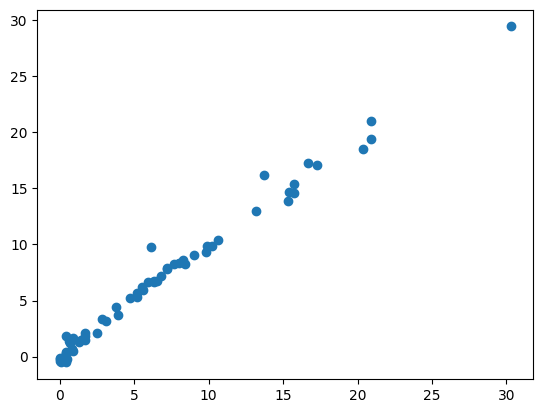

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
## Elastic Net Regression

## Ridge Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

r_score = r2_score(y_test, y_pred)
print(r_score)


1.8822353634896
0.8753460589519703


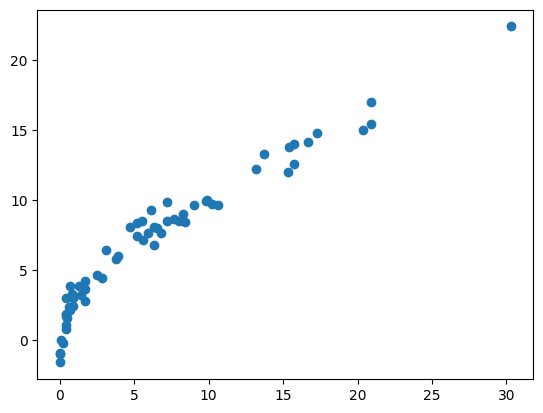

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
## pickle the file

import pickle

pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))